In [133]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [134]:
data_dir = Path('./Data_Files')

In [135]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [136]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [137]:
data_dir2 = Path("./Jun30_data_files/")

In [138]:
# for dir,subdir,files in os.walk(data_dir2):
#     for i in files:
#         print (i)
#         if i=="test2.txt" and i == "TEST2.TXT.sb-5b453c2d-NvFVlZ":
#             continue
#         dataframe = pd.read_csv(data_dir2 / i, low_memory=False, names= ['frequency','amplitude'] , index_col = False)
#         dataframe = dataframe[dataframe['frequency'] != "clocktime"]
#         print(dataframe)
#         dataframe = dataframe.dropna()
#         #dataframe = dataframe[:129]
#         #print(dataframe[:129*7])
#         df12 = df12.append(dataframe)

In [139]:
df12 = pd.read_csv(data_dir2 / "Dist1_4.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df12 = df12[df12['frequency'] != "clocktime"]

df13 = pd.read_csv(data_dir2 / "Dist1_6.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df13 = df12[df12['frequency'] != "clocktime"]

df14 = pd.read_csv(data_dir2 / "Dist1_8.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df14 = df12[df12['frequency'] != "clocktime"]

df15 = pd.read_csv(data_dir2 / "Dist1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df15 = df12[df12['frequency'] != "clocktime"]

df16 = pd.read_csv(data_dir2 / "Dist2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df16 = df12[df12['frequency'] != "clocktime"]

df17 = pd.read_csv(data_dir2 / "Dist1_2.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df17 = df12[df12['frequency'] != "clocktime"]

df18 = pd.read_csv(data_dir2 / "Dist0_5.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df18 = df12[df12['frequency'] != "clocktime"]

df19 = pd.read_csv(data_dir2 / "Dist0_3.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df19 = df12[df12['frequency'] != "clocktime"]

In [140]:
df13[:129*8]

,frequency,amplitude
0,0.00,70114.9841
1,62.50,29887.4292
2,125.00,206.4397
3,187.50,151.0746
4,250.00,39.4420
...,...,...
644,7750.00,2.0705
645,7812.50,3.5518
646,7875.00,0.4167
647,7937.50,2.9480


In [141]:
df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19])
df

,frequency,amplitude
0,0,17959.1616
1,NaN,NaN
2,62.5,14926.8584
3,NaN,NaN
4,125,8456.3285
...,...,...
644,7750.00,2.0705
645,7812.50,3.5518
646,7875.00,0.4167
647,7937.50,2.9480


In [142]:
df = df.dropna()
df[:129*800]

,frequency,amplitude
0,0,17959.1616
2,62.5,14926.8584
4,125,8456.3285
6,187.5,1466.4065
8,250,1123.9574
...,...,...
644,7750.00,2.0705
645,7812.50,3.5518
646,7875.00,0.4167
647,7937.50,2.9480


In [143]:
def convert(df: pd.DataFrame, frame_size=129):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [144]:
# df = df[df.columns[1:2]]
df

,frequency,amplitude
0,0,17959.1616
2,62.5,14926.8584
4,125,8456.3285
6,187.5,1466.4065
8,250,1123.9574
...,...,...
644,7750.00,2.0705
645,7812.50,3.5518
646,7875.00,0.4167
647,7937.50,2.9480


In [145]:
data = convert(df)
data.shape


(746, 129)

In [146]:
X = data[:,:-1]

X = X[:, :9]
X.shape

(746, 9)

In [147]:
y = data[:, -1]
y.shape
# print(y)

(746,)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [150]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [151]:
print(y_pred[:5])
print(y_test[:5])

[20.50620462 21.77165416 20.32929101 21.16979528 16.84730917]
[19.79 22.15 20.04 19.04 19.29]


In [152]:
print(y_train_pred[:5])
print(y_train[:5])

[ 9.99922491 21.72321833 21.64340039 20.97662423 21.93819846]
[ 6.77 22.15 22.15 21.61 21.34]


In [153]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))

MSE of test:  8.10672440892762


In [154]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

MSE of training:  1.2368627212143546


Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

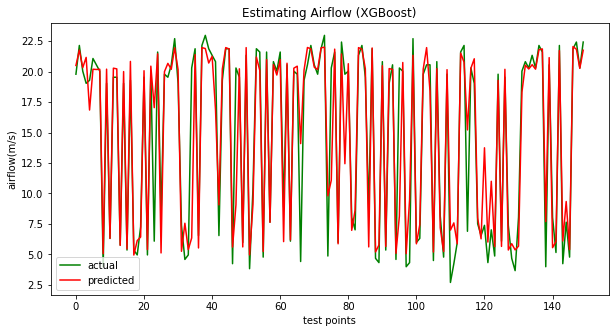

In [155]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'g', label="actual")
plt.plot(y_pred, 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")